In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction import text 

In [2]:
training=pd.read_csv('../Data/training.csv')
validation= pd.read_csv('../Data/validation.csv')

In [24]:
data=pd.read_csv('data.csv')

### Word cloud of happy songs

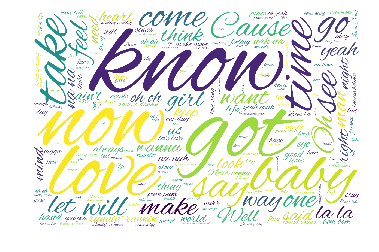

In [3]:
happyWords = ' '.join(training.loc[training['mood']=='happy', 'lyrics'])

happy_wordcloud = WordCloud( 
                      font_path='../alex-brush/AlexBrush-Regular.ttf',
                      stopwords=STOPWORDS,
                      background_color='white',
                      width=1200,
                      height=800
            ).generate(happyWords)

plt.imshow(happy_wordcloud)
plt.axis('off')
plt.savefig('../Images/wordcloud_happy_all_w.png', dpi=600)
plt.show()

### Word cloud of Sad songs

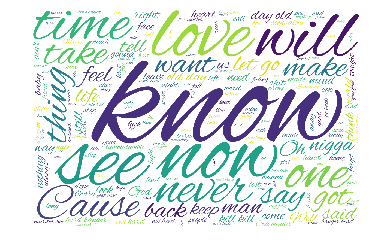

In [5]:
sadWords = ' '.join(training.loc[training['mood']=='sad', 'lyrics'])

sad_wordcloud = WordCloud( 
                      font_path='../alex-brush/AlexBrush-Regular.ttf',
                      stopwords=STOPWORDS,
                      background_color='white',
                      width=1200,
                      height=800
            ).generate(sadWords)

plt.imshow(sad_wordcloud)
plt.axis('off')
plt.savefig('../Images/wordcloud_sad_all_w.png', dpi=600)
plt.show()

### Mood by Year Distribution

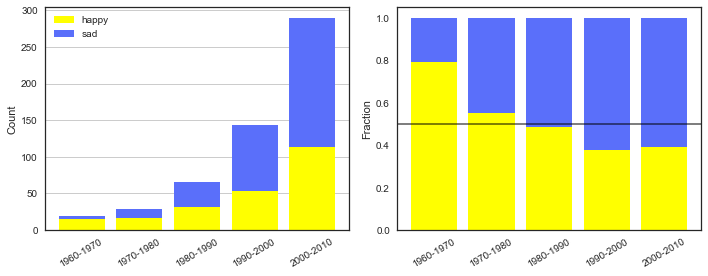

In [7]:
import seaborn as sns


blue = '#5A6FFA'
green = '#A3EB5B'
yellow = '#FFFF00'
maroon = '#800000'
crimson = '#DC143C'

bins = np.arange(1960,2011,10)
happy_bins, b = np.histogram(training.loc[training.loc[:,'mood']=='happy', 'year'], bins=bins)
sad_bins, b = np.histogram(training.loc[training.loc[:,'mood']=='sad', 'year'], bins=bins)
year_bins, b = np.histogram(training.loc[:, 'year'], bins=bins)

fig = plt.figure(figsize=(10,4))

sns.set(style="white")

pos = np.arange(1,6)
labels = ['%s-%s' %(i, i+10) for i in np.arange(1960,2011,10)]

# absolute values
plt.subplot(121)
plt.bar(pos, happy_bins, label='happy', color=yellow)
plt.bar(pos, sad_bins, bottom=happy_bins, color=blue, label='sad')
plt.xticks(pos, labels, rotation=30)
plt.ylabel("Count")
plt.xlabel("")
plt.legend(loc='upper left')

plt.gca().yaxis.grid(True) 

# relative values

# normalize
happy_bins = happy_bins / year_bins
sad_bins = sad_bins / year_bins

plt.subplot(122)
plt.bar(pos, happy_bins, color=yellow)
plt.bar(pos, sad_bins, bottom=happy_bins, color=blue, label='sad')
plt.xticks(pos, labels, rotation='30')
plt.ylabel("Fraction")
plt.axhline(y=0.5, xmin=0, linewidth=2, color='black', alpha=0.5)
plt.xlabel("")
plt.tight_layout()
plt.savefig('../Images/bar_year_mood.png', dpi=300)